## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9, 0.7, 0.5, 0.3, 0.1]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag =  "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 2s 43us/step - loss: 0.4607 - accuracy: 0.8368 - val_loss: 2.0739 - val_accuracy: 0.4944
Epoch 48/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.4373 - accuracy: 0.8445 - val_loss: 1.9702 - val_accuracy: 0.5229
Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4208 - accuracy: 0.8516 - val_loss: 2.1355 - val_accuracy: 0.4972
Epoch 50/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4293 - accuracy: 0.8481 - val_loss: 2.0343 - val_accuracy: 0.5032
Experiment with MOMENTUM = 0.700000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_____________________________________

50000/50000 [==============================] - 2s 44us/step - loss: 0.9095 - accuracy: 0.6821 - val_loss: 1.6340 - val_accuracy: 0.4557
Epoch 46/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.8964 - accuracy: 0.6882 - val_loss: 1.6009 - val_accuracy: 0.4812
Epoch 47/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.8863 - accuracy: 0.6906 - val_loss: 1.5756 - val_accuracy: 0.4898
Epoch 48/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.8742 - accuracy: 0.6915 - val_loss: 1.3690 - val_accuracy: 0.5352
Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.8520 - accuracy: 0.7007 - val_loss: 1.5567 - val_accuracy: 0.4888
Epoch 50/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.8453 - accuracy: 0.7050 - val_loss: 1.5247 - val_accuracy: 0.5073
Experiment with MOMENTUM = 0.500000
Model: "model_1"
_________________________________________________________________
Layer

50000/50000 [==============================] - 2s 44us/step - loss: 1.0992 - accuracy: 0.6160 - val_loss: 1.4023 - val_accuracy: 0.5075
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0871 - accuracy: 0.6180 - val_loss: 1.6124 - val_accuracy: 0.4591
Epoch 45/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0797 - accuracy: 0.6226 - val_loss: 1.5851 - val_accuracy: 0.4858
Epoch 46/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.0725 - accuracy: 0.6235 - val_loss: 1.3294 - val_accuracy: 0.5248
Epoch 47/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0598 - accuracy: 0.6281 - val_loss: 1.4281 - val_accuracy: 0.5050
Epoch 48/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0484 - accuracy: 0.6339 - val_loss: 1.4722 - val_accuracy: 0.4873
Epoch 49/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0461 - accuracy: 0.6324 - val_loss: 1.4313

50000/50000 [==============================] - 2s 44us/step - loss: 1.2138 - accuracy: 0.5743 - val_loss: 1.5061 - val_accuracy: 0.4542
Epoch 42/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2028 - accuracy: 0.5769 - val_loss: 1.4241 - val_accuracy: 0.4974
Epoch 43/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2050 - accuracy: 0.5762 - val_loss: 1.3675 - val_accuracy: 0.5194
Epoch 44/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1973 - accuracy: 0.5798 - val_loss: 1.3699 - val_accuracy: 0.5111
Epoch 45/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1825 - accuracy: 0.5838 - val_loss: 1.5551 - val_accuracy: 0.4610
Epoch 46/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1791 - accuracy: 0.5862 - val_loss: 1.3604 - val_accuracy: 0.5132
Epoch 47/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1697 - accuracy: 0.5905 - val_loss: 1.3901

50000/50000 [==============================] - 2s 44us/step - loss: 1.2911 - accuracy: 0.5473 - val_loss: 1.4480 - val_accuracy: 0.4828
Epoch 40/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2847 - accuracy: 0.5479 - val_loss: 1.4969 - val_accuracy: 0.4632
Epoch 41/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2813 - accuracy: 0.5519 - val_loss: 1.4353 - val_accuracy: 0.4859
Epoch 42/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2692 - accuracy: 0.5562 - val_loss: 1.5889 - val_accuracy: 0.4391
Epoch 43/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2630 - accuracy: 0.5568 - val_loss: 1.5040 - val_accuracy: 0.4700
Epoch 44/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2549 - accuracy: 0.5612 - val_loss: 1.4369 - val_accuracy: 0.4903
Epoch 45/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2497 - accuracy: 0.5612 - val_loss: 1.3878

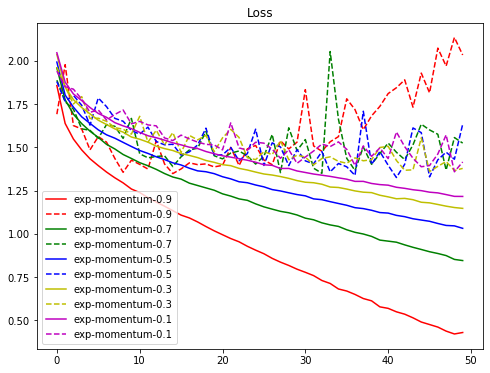

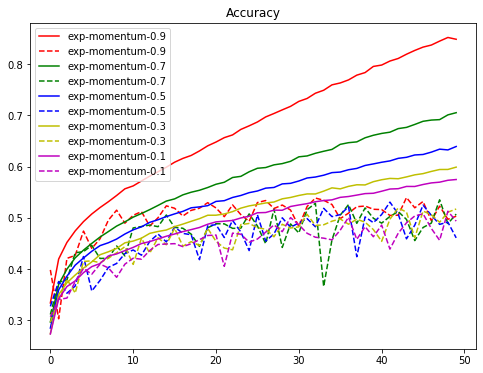

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()